# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.utils import shuffle
data=pd.read_csv('compresive_strength_concrete.csv')

In [2]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
data.corr()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash (component 3)(kg in a m^3 mixture),-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water (component 4)(kg in a m^3 mixture),-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer (component 5)(kg in a m^3 mixture),0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age (day),0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [4]:
data=shuffle(data)


In [5]:
data.shape

(1030, 9)

In [6]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
strength                                                 0
dtype: int64

In [47]:
min_d = data.min()
max_d = data.max()
normalized_df=(data - min_d)/(max_d - min_d)
normalized_df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
245,0.310731,0.000000,0.470265,0.518371,0.217391,0.432849,0.634722,0.035714,0.291018
439,0.163927,0.259878,0.799100,0.403355,0.301242,0.599419,0.382840,0.074176,0.442008
674,0.305936,0.436839,0.000000,0.560703,0.000000,0.498837,0.389112,0.005495,0.140027
653,0.000000,0.425710,0.000000,0.560703,0.000000,0.250000,0.873056,0.244505,0.288152
461,0.149315,0.361436,0.642679,0.428914,0.242236,0.596802,0.382840,0.271978,0.639467


# **Manually splitting data**

In [48]:
train_data=normalized_df.iloc[:515]
train_targets=normalized_df.strength.iloc[:515]
train_targets=np.asarray(train_targets)
train_data.drop('strength',axis=1,inplace=True)


print(train_data.shape)

test_data=normalized_df.iloc[515:766]
test_targets=normalized_df.strength.iloc[515:766]
test_targets=np.asarray(test_targets)
test_data.drop('strength',axis=1,inplace=True)


print(test_data.shape)

(515, 8)
(251, 8)


In [49]:
val_data=normalized_df.iloc[766:]
val_data.drop('strength',axis=1,inplace=True)

val_targets=normalized_df.strength.iloc[766:]
val_targets=np.asarray(val_targets)

# **Creating model with 100 epochs **

In [50]:
model = models.Sequential()
model.add(layers.Dense(10,activation='relu',input_shape=(train_data.iloc[1].shape)))

model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(6,activation='relu'))
model.add(layers.Dense(1))


In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(optimizer='rmsprop', loss='mse', metrics=["accuracy"])
his=model.fit(train_data,train_targets,epochs=100,batch_size=1,validation_data=(val_data,val_targets))

Train on 515 samples, validate on 264 samples
Epoch 1/100
515/515 [==============================] - 1s 3ms/sample - loss: 0.0276 - acc: 0.0039 - val_loss: 0.0178 - val_acc: 0.0000e+00
Epoch 2/100
515/515 [==============================] - 1s 2ms/sample - loss: 0.0165 - acc: 0.0039 - val_loss: 0.0175 - val_acc: 0.0000e+00
Epoch 3/100
515/515 [==============================] - 1s 2ms/sample - loss: 0.0149 - acc: 0.0039 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 4/100
515/515 [==============================] - 1s 2ms/sample - loss: 0.0137 - acc: 0.0039 - val_loss: 0.0155 - val_acc: 0.0000e+00
Epoch 5/100
515/515 [==============================] - 1s 2ms/sample - loss: 0.0126 - acc: 0.0039 - val_loss: 0.0134 - val_acc: 0.0000e+00
Epoch 6/100
515/515 [==============================] - 1s 2ms/sample - loss: 0.0123 - acc: 0.0039 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 7/100
515/515 [==============================] - 1s 2ms/sample - loss: 0.0112 - acc: 0.0039 - val_loss: 0.0117 - v

515/515 [==============================] - 1s 2ms/sample - loss: 0.0061 - acc: 0.0039 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 60/100
515/515 [==============================] - 1s 2ms/sample - loss: 0.0063 - acc: 0.0039 - val_loss: 0.0062 - val_acc: 0.0000e+00
Epoch 61/100
515/515 [==============================] - 1s 2ms/sample - loss: 0.0059 - acc: 0.0039 - val_loss: 0.0069 - val_acc: 0.0000e+00
Epoch 62/100
515/515 [==============================] - 1s 2ms/sample - loss: 0.0061 - acc: 0.0039 - val_loss: 0.0070 - val_acc: 0.0000e+00
Epoch 63/100
515/515 [==============================] - 1s 2ms/sample - loss: 0.0063 - acc: 0.0039 - val_loss: 0.0069 - val_acc: 0.0000e+00
Epoch 64/100
515/515 [==============================] - 1s 2ms/sample - loss: 0.0060 - acc: 0.0039 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 65/100
515/515 [==============================] - 1s 2ms/sample - loss: 0.0061 - acc: 0.0039 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 66/100
515/515 [===========

In [53]:
model.evaluate(test_data,test_targets)

251/251 [==============================] - 0s 32us/sample - loss: 0.0094 - acc: 0.0000e+00


[0.009434801133060123, 0.0]

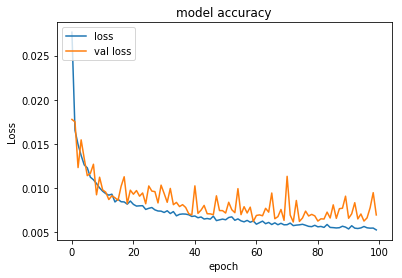

In [54]:
from matplotlib import pyplot as plt
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss'], loc='upper left')
plt.show()

In [39]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01),activation='relu',input_shape=(train_data.iloc[1].shape)))
model.add(layers.Dense(8,kernel_regularizer=regularizers.l1(0.01),activation='relu'))

model.add(layers.Dense(4,kernel_regularizer=regularizers.l2(0.01),activation='relu'))

model.add(layers.Dense(1))


In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='rmsprop', loss='mse',metrics=['accuracy', 'mse'])
his=model.fit(train_data,train_targets,epochs=100,batch_size=20,validation_data=(val_data,val_targets))

Train on 515 samples, validate on 264 samples
Epoch 1/100
515/515 [==============================] - 0s 885us/sample - loss: 2353.6079 - acc: 0.0000e+00 - mean_squared_error: 2353.1453 - val_loss: 1449.3745 - val_acc: 0.0000e+00 - val_mean_squared_error: 1448.9316
Epoch 2/100
515/515 [==============================] - 0s 117us/sample - loss: 1547.2413 - acc: 0.0000e+00 - mean_squared_error: 1546.8137 - val_loss: 1266.3795 - val_acc: 0.0000e+00 - val_mean_squared_error: 1265.9686
Epoch 3/100
515/515 [==============================] - 0s 124us/sample - loss: 855.7736 - acc: 0.0000e+00 - mean_squared_error: 855.3782 - val_loss: 526.7880 - val_acc: 0.0000e+00 - val_mean_squared_error: 526.4082
Epoch 4/100
515/515 [==============================] - 0s 124us/sample - loss: 474.6751 - acc: 0.0000e+00 - mean_squared_error: 474.3082 - val_loss: 462.4583 - val_acc: 0.0000e+00 - val_mean_squared_error: 462.1050
Epoch 5/100
515/515 [==============================] - 0s 119us/sample - loss: 398.782

Epoch 78/100
515/515 [==============================] - 0s 98us/sample - loss: 45.9114 - acc: 0.0000e+00 - mean_squared_error: 45.7457 - val_loss: 75.2953 - val_acc: 0.0000e+00 - val_mean_squared_error: 75.1294
Epoch 79/100
515/515 [==============================] - 0s 124us/sample - loss: 47.2643 - acc: 0.0000e+00 - mean_squared_error: 47.0976 - val_loss: 46.4481 - val_acc: 0.0000e+00 - val_mean_squared_error: 46.2814
Epoch 80/100
515/515 [==============================] - 0s 105us/sample - loss: 46.0983 - acc: 0.0000e+00 - mean_squared_error: 45.9314 - val_loss: 44.6078 - val_acc: 0.0000e+00 - val_mean_squared_error: 44.4409
Epoch 81/100
515/515 [==============================] - 0s 97us/sample - loss: 47.0317 - acc: 0.0000e+00 - mean_squared_error: 46.8647 - val_loss: 45.4151 - val_acc: 0.0000e+00 - val_mean_squared_error: 45.2479
Epoch 82/100
515/515 [==============================] - 0s 111us/sample - loss: 44.6623 - acc: 0.0000e+00 - mean_squared_error: 44.4951 - val_loss: 50.729

In [42]:
model.evaluate(test_data,test_targets)

251/251 [==============================] - 0s 64us/sample - loss: 52.7950 - acc: 0.0000e+00 - mean_squared_error: 52.6241


[52.79500243958249, 0.0, 52.624065]

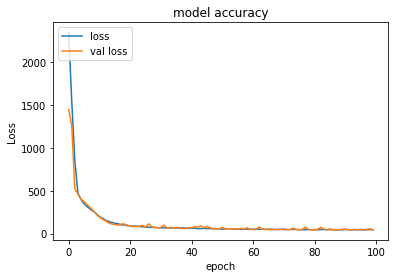

In [44]:
from matplotlib import pyplot as plt
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss'], loc='upper left')
plt.show()

### Predicting value

In [45]:
pred=model.predict(test_data)
pred[4]

array([34.64083], dtype=float32)

In [46]:
test_targets[4]

40.15